## XOR 이해하기 with Keras

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.0'

In [3]:
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

Remember !! XOR : 모두 같으면 0

In [4]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [0,
          1,
          1,
          0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

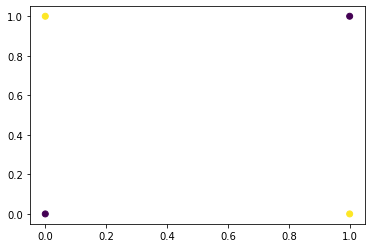

In [5]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
#model.add(layers.Dense(2)) # comment out
#model.add(layers.Activation('tanh')) # comment out
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [8]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


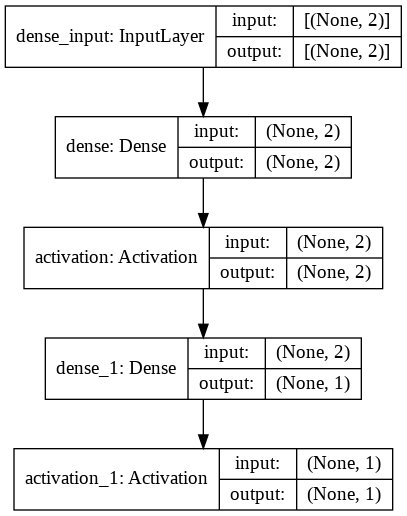

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_xor.png', show_shapes=True)

In [11]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 0.7130 - accuracy: 0.4667
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7179 - accuracy: 0.4667
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 0.7162 - accuracy: 0.4667
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7073 - accuracy: 0.2667
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7217 - accuracy: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7184 - accuracy: 0.0000e+00
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.1667
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.0000e+00
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.7333
Epoch 11/500


### 학습 결과 그려보기

Text(0.5, 0, 'epoch')

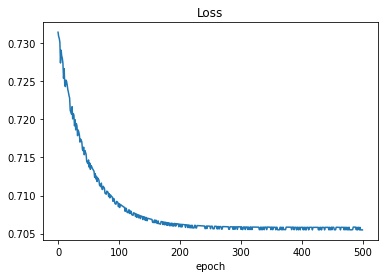

In [12]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

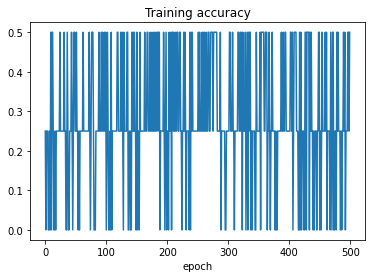

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

###  확률 찍어보기

In [14]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.49948603]
 [0.49948427]
 [0.49947086]
 [0.4994691 ]]


In [15]:
predicted = hypothesis > 0.5
print(predicted)

[[False]
 [False]
 [False]
 [False]]


### 생각해보기

* XOR 분류에서 정확도 75의 의미는?